In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_name = 'dual_benchmark'
base_directory = '../report'

In [3]:
schemes = ['1_LSCHEME', '2_LSCHEME', 'NEWTON', 'PICARD']
directories = [os.path.join(base_directory, problem_name + '_' + scheme) for scheme in schemes]

In [4]:
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [5]:
for directory in directories:
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
    
    scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
    scheme_dictionary[scheme] = []

    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

    for file in files:
        scheme_dictionary[scheme].append( file )
    
    scheme_dictionary[scheme].sort()

Pattern ../report/dual_benchmark_1_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../report/dual_benchmark_2_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../report/dual_benchmark_NEWTON/*_dual_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../report/dual_benchmark_PICARD/*_dual_benchmark*.csv matched with 8 files of scheme PICARD


In [6]:
for directory in directories:
    file = glob.glob(os.path.join(directory, problem_name +'*.csv'))[0]
    scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
    
    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

    scheme_time[scheme] = []

    with open(file, 'r') as csvfile:
        lines = list(csv.reader(csvfile, delimiter=','))
        for row in lines[1:]:
            scheme_time[scheme].append(float(row[-1]))   

Pattern ../report/dual_benchmark_1_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../report/dual_benchmark_2_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../report/dual_benchmark_NEWTON/*_dual_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../report/dual_benchmark_PICARD/*_dual_benchmark*.csv matched with 8 files of scheme PICARD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


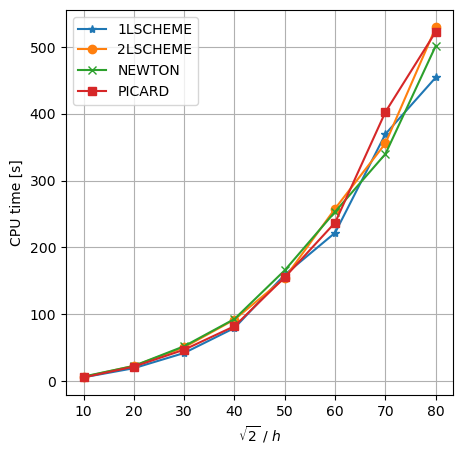

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for scheme, symbol in zip(scheme_time, symbols):
    values = scheme_time[scheme]

    ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
    ax.set_ylabel('CPU time [s]')
    ax.set_xlabel('$\sqrt{2}$ / $h$')

    names.append(scheme.replace('_', ''))

ax.legend(names)
ax.grid()

plt.savefig('time_comparison.eps', format='eps')